In [ ]:
# Import and Initialization

import importlib
import pandas as pd
import numpy as np
import BayesianNetworks
from BayesianNetworks import \
readFactorTable as read_list,\
readFactorTablefromData as read_data,\
joinFactors as join,\
marginalizeFactor as marg,\
evidenceUpdateNet as evid,\
inference as infer

riskNet = pd.read_csv('RiskFactorsData.csv')

income = read_data(riskNet, ['income'])
smoke = read_data(riskNet, ['smoke', 'income'])
exercise = read_data(riskNet, ['exercise', 'income'])
long_sit = read_data(riskNet, ['long_sit', 'income'])
stay_up = read_data(riskNet, ['stay_up', 'income'])
bmi = read_data(riskNet, ['bmi', 'income', 'exercise', 'long_sit'])
bp = read_data(riskNet, ['bp', 'income', 'exercise', 'long_sit', 'stay_up', 'smoke'])
cholest = read_data(riskNet, ['cholesterol', 'income', 'exercise', 'stay_up', 'smoke']) # 胆固醇
diabetes = read_data(riskNet, ['diabetes', 'bmi']) # 糖尿病
stroke = read_data(riskNet, ['stroke', 'bmi', 'bp', 'cholesterol'])
angina = read_data(riskNet, ['angina', 'bmi', 'bp', 'cholesterol']) # 心绞痛
attack = read_data(riskNet, ['attack', 'bmi', 'bp', 'cholesterol'])


1. Create the following Bayesian network to analyze the survey results. You will want to use the provided
function createCPTfromData.
What is the size (in terms of the number of probabilities needed) of this network? Alternatively, what
is the total number of probabilities needed to store the full joint distribution?

In [36]:
BayesNet = [income, smoke, exercise, long_sit, stay_up, bmi, bp, cholest, diabetes, stroke, angina, attack]

size_net = 0

for factor in BayesNet:
    size_net += factor.shape[0]

print(f"The size of the bayes net is {size_net}.")

The size of the bayes net is 1048.


2. For each of the four health outcomes (diabetes, stroke, heart attack, angina), answer the following by
querying your network (using your infer function):
(a) What is the probability of the outcome if I have bad habits (smoke, don’t exercise,long sitting
and stay up)? How about if I have good habits?
(b) What is the probability of the outcome if I have poor health (high blood pressure, high cholesterol,
and overweight)? What if I have good health (low blood pressure, low cholesterol, and normal
weight)?

In [64]:
# (a)
import importlib
import BayesianNetworks
importlib.reload(BayesianNetworks)
from BayesianNetworks import \
readFactorTable as read_list,\
readFactorTablefromData as read_data,\
joinFactors as join,\
marginalizeFactor as marg,\
evidenceUpdateNet as evid,\
inference as infer

bad_habit_table = infer(BayesNet, ['income', 'bmi', 'bp', 'cholesterol'], ['smoke', 'exercise', 'long_sit', 'stay_up'], [1, 2, 1, 1])

print("(a)If you have bad habits, the probabilities that you have each health problem is as follows:")

health_outcomes = ['diabetes', 'stroke', 'attack', 'angina']

for outcome in health_outcomes:
    m = marg(bad_habit_table, [oc for oc in health_outcomes if oc != outcome])
    print(f"- {outcome}: {m.loc[m[outcome] == 1]['probs'].iloc[0]}")

print("\n")

good_habit_table = infer(BayesNet, ['income', 'bmi', 'bp', 'cholesterol'], ['smoke', 'exercise', 'long_sit', 'stay_up'], [2, 1, 2, 2])

print("If you have good habits, the probabilities that you have each health problem is as follows:")

health_outcomes = ['diabetes', 'stroke', 'attack', 'angina']

for outcome in health_outcomes:
    m = marg(good_habit_table, [oc for oc in health_outcomes if oc != outcome])
    print(f"- {outcome}: {m.loc[m[outcome] == 1]['probs'].iloc[0]}")


(a)If you have bad habits, the probabilities that you have each health problem is as follows:
- diabetes: 0.1796845567127721
- stroke: 0.053783054506654104
- attack: 0.08560619240891772
- angina: 0.0950935453205552


If you have good habits, the probabilities that you have each health problem is as follows:
- diabetes: 0.07440604734997436
- stroke: 0.02939015003013203
- attack: 0.036246688444733055
- angina: 0.03480791596138738


In [65]:
bad_health_table = infer(BayesNet, ['income', 'smoke', 'exercise', 'long_sit', 'stay_up'], ['bmi', 'bp', 'cholesterol'], [3, 1, 1])

print("(b)If you have bad health, the probabilities that you have each health problem is as follows:")

health_outcomes = ['diabetes', 'stroke', 'attack', 'angina']

for outcome in health_outcomes:
    m = marg(bad_health_table, [oc for oc in health_outcomes if oc != outcome])
    print(f"- {outcome}: {m.loc[m[outcome] == 1]['probs'].iloc[0]}")

print("\n")

good_health_table = infer(BayesNet, ['income', 'smoke', 'exercise', 'long_sit', 'stay_up'], ['bmi', 'bp', 'cholesterol'], [2, 3, 2])

print("If you have good health, the probabilities that you have each health problem is as follows:")

health_outcomes = ['diabetes', 'stroke', 'attack', 'angina']

for outcome in health_outcomes:
    m = marg(good_health_table, [oc for oc in health_outcomes if oc != outcome])
    print(f"- {outcome}: {m.loc[m[outcome] == 1]['probs'].iloc[0]}")

(b)If you have bad health, the probabilities that you have each health problem is as follows:
- diabetes: 0.11442040761053557
- stroke: 0.08373575429785589
- attack: 0.14107269332303135
- angina: 0.1610649668405125


If you have good health, the probabilities that you have each health problem is as follows:
- diabetes: 0.056980800262824795
- stroke: 0.014633237021157612
- attack: 0.015994034858793926
- angina: 0.013123310653369375


3. Evaluate the effect a person’s income has on their probability of having one of the four health outcomes
(diabetes, stroke, heart attack, angina). For each of these four outcomes, plot their probability given
income status (your horizontal axis should be i = 1, 2, ..., 8, and your vertical axis should be P (y =
1|income = i), where y is the outcome). What can you conclude?

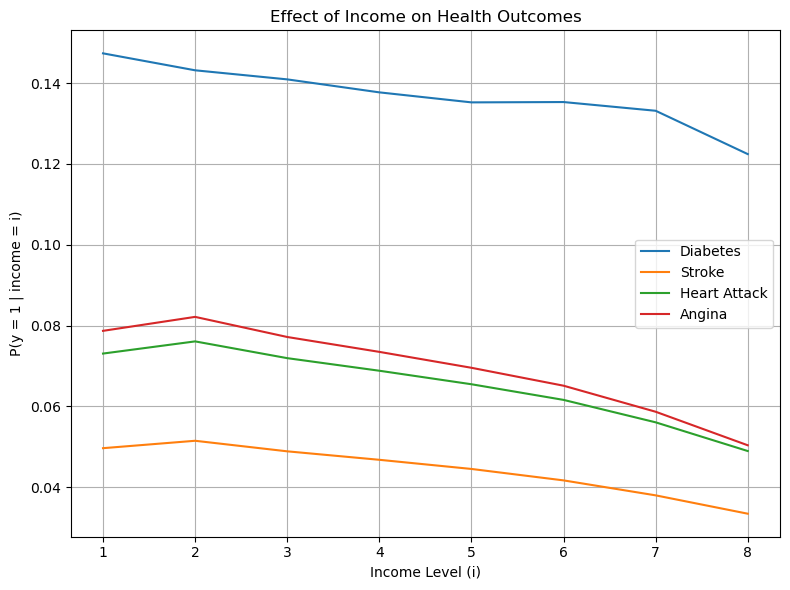

In [68]:
import matplotlib.pyplot as plt

diabetes_probs = []
stroke_probs = []
heartattack_probs = []
angina_probs = []

for income in range(1, 9):

    income_effect_table = infer(BayesNet, ['smoke', 'exercise', 'long_sit', 'stay_up', 'bmi', 'bp', 'cholesterol'], ['income'], [income])

    diabetes_table = marg(income_effect_table, ['stroke', 'attack', 'angina'])

    diabetes_probs.append(diabetes_table[diabetes_table['diabetes'] == 1]['probs'].iloc[0])

    stroke_table = marg(income_effect_table, ['diabetes', 'attack', 'angina'])

    stroke_probs.append(stroke_table[stroke_table['stroke'] == 1]['probs'].iloc[0])

    heartattack_table = marg(income_effect_table, ['stroke', 'diabetes', 'angina'])

    heartattack_probs.append(heartattack_table[heartattack_table['attack'] == 1]['probs'].iloc[0])

    angina_table = marg(income_effect_table, ['stroke', 'attack', 'diabetes'])

    angina_probs.append(angina_table[angina_table['angina'] == 1]['probs'].iloc[0])


income_levels = list(range(1, 9))  # [1, 2, ..., 8]

plt.figure(figsize=(8, 6))
plt.plot(income_levels, diabetes_probs, label='Diabetes')
plt.plot(income_levels, stroke_probs, label='Stroke')
plt.plot(income_levels, heartattack_probs, label='Heart Attack')
plt.plot(income_levels, angina_probs, label='Angina')

plt.xlabel('Income Level (i)')
plt.ylabel('P(y = 1 | income = i)')
plt.title('Effect of Income on Health Outcomes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the plot, I can tell two facts:

(1) With higher income level, probabilities of all four kinds of diseases go down, so better income may contribute to less disease.
(2) Over the four kinds of diseases among all levels of income, diabetes occur the most frequently, whilc stroke occur the less frequently.

4. Notice there are no links in the graph between the habits and the outcomes.
What assumption is this making about the effects of smoking and exercise on health problems? Let’s
test the validity of these assumptions. Create a second Bayesian network as above, but add edges from
smoking to each of the four outcomes and edges from exercise to each of the four outcomes. Now redo
the queries in Question 2. What was the effect, and do you think the assumptions of the first graph
were valid or not?

In [ ]:
riskNet = pd.read_csv('RiskFactorsData.csv')

income = read_data(riskNet, ['income'])
smoke = read_data(riskNet, ['smoke', 'income'])
exercise = read_data(riskNet, ['exercise', 'income'])
long_sit = read_data(riskNet, ['long_sit', 'income'])
stay_up = read_data(riskNet, ['stay_up', 'income'])
bmi = read_data(riskNet, ['bmi', 'income', 'exercise', 'long_sit'])
bp = read_data(riskNet, ['bp', 'income', 'exercise', 'long_sit', 'stay_up', 'smoke'])
cholest = read_data(riskNet, ['cholesterol', 'income', 'exercise', 'stay_up', 'smoke']) # 胆固醇
diabetes = read_data(riskNet, ['diabetes', 'bmi', 'smoke', 'exercise']) # 糖尿病
stroke = read_data(riskNet, ['stroke', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise'])
angina = read_data(riskNet, ['angina', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise']) # 心绞痛
attack = read_data(riskNet, ['attack', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise'])

BayesNet = [income, smoke, exercise, long_sit, stay_up, bmi, bp, cholest, diabetes, stroke, angina, attack]

bad_habit_table = infer(BayesNet, ['income', 'bmi', 'bp', 'cholesterol'], ['smoke', 'exercise', 'long_sit', 'stay_up'], [1, 2, 1, 1])

print("(a)If you have bad habits, the probabilities that you have each health problem is as follows:")

health_outcomes = ['diabetes', 'stroke', 'attack', 'angina']

for outcome in health_outcomes:
    m = marg(bad_habit_table, [oc for oc in health_outcomes if oc != outcome])
    print(f"- {outcome}: {m.loc[m[outcome] == 1]['probs'].iloc[0]}")

print("\n")

good_habit_table = infer(BayesNet, ['income', 'bmi', 'bp', 'cholesterol'], ['smoke', 'exercise', 'long_sit', 'stay_up'], [2, 1, 2, 2])

print("If you have good habits, the probabilities that you have each health problem is as follows:")

health_outcomes = ['diabetes', 'stroke', 'attack', 'angina']

for outcome in health_outcomes:
    m = marg(good_habit_table, [oc for oc in health_outcomes if oc != outcome])
    print(f"- {outcome}: {m.loc[m[outcome] == 1]['probs'].iloc[0]}")

print("\n")

bad_health_table = infer(BayesNet, ['income', 'smoke', 'exercise', 'long_sit', 'stay_up'], ['bmi', 'bp', 'cholesterol'], [3, 1, 1])

print("(b)If you have bad health, the probabilities that you have each health problem is as follows:")

health_outcomes = ['diabetes', 'stroke', 'attack', 'angina']

for outcome in health_outcomes:
    m = marg(bad_health_table, [oc for oc in health_outcomes if oc != outcome])
    print(f"- {outcome}: {m.loc[m[outcome] == 1]['probs'].iloc[0]}")

print("\n")

good_health_table = infer(BayesNet, ['income', 'smoke', 'exercise', 'long_sit', 'stay_up'], ['bmi', 'bp', 'cholesterol'], [2, 3, 2])

print("If you have good health, the probabilities that you have each health problem is as follows:")

health_outcomes = ['diabetes', 'stroke', 'attack', 'angina']

for outcome in health_outcomes:
    m = marg(good_health_table, [oc for oc in health_outcomes if oc != outcome])
    print(f"- {outcome}: {m.loc[m[outcome] == 1]['probs'].iloc[0]}")

(a)If you have bad habits, the probabilities that you have each health problem is as follows:
- diabetes: 0.2466907421997436
- stroke: 0.08088181221862281
- attack: 0.13563231125420805
- angina: 0.13804114406095389


If you have good habits, the probabilities that you have each health problem is as follows:
- diabetes: 0.05576155616484895
- stroke: 0.019589809785240563
- attack: 0.021058123344538895
- angina: 0.023596047799734423
(b)If you have bad health, the probabilities that you have each health problem is as follows:
- diabetes: 0.12013390316425754
- stroke: 0.08374005218091235
- attack: 0.140240442199526
- angina: 0.16041693839228313


If you have good health, the probabilities that you have each health problem is as follows:
- diabetes: 0.05517615493861087
- stroke: 0.014719065353818117
- attack: 0.016014050599026382
- angina: 0.013126217424413758


(4) 

The effect: we can see in (b) it have not many change, but in (a) we can see the probs go bigger for bad-habits state and go smaller for good-habits, which means the affect on health outcome from habits becomes bigger.

It's valid, since given the state of either habits or health, we may find that still four kinds of health outcome is conditionally independent. By the result we can also see that the probs-trend is similar to what we get in question(2).

5. Also notice there are no edges between the four outcomes. What assumption is this making about the
interactions between health problems? Make a third network, starting from the network in Question
4, but adding an edge from diabetes to stroke. For both networks, evaluate the following probabilities:
P (stroke = 1|diabetes = 1)andP (stroke = 1|diabetes = 3)
Again, what was the effect, and was the assumption about the interaction between diabetes and stroke
valid?

In [70]:
dia_1_table = infer(BayesNet, ['income', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise', 'long_sit', 'stay_up', 'angina', 'attack'], ['diabetes'], [1])
dia_3_table = infer(BayesNet, ['income', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise', 'long_sit', 'stay_up', 'angina', 'attack'], ['diabetes'], [3])

print(f"In the q-4-net, we get P(stroke=1|diabetes=1)={dia_1_table.loc[dia_1_table['stroke'] == 1]['probs'].iloc[0]} and P(stroke=1|diabetes=3)={dia_3_table.loc[dia_1_table['stroke'] == 1]['probs'].iloc[0]}")

riskNet = pd.read_csv('RiskFactorsData.csv')

income = read_data(riskNet, ['income'])
smoke = read_data(riskNet, ['smoke', 'income'])
exercise = read_data(riskNet, ['exercise', 'income'])
long_sit = read_data(riskNet, ['long_sit', 'income'])
stay_up = read_data(riskNet, ['stay_up', 'income'])
bmi = read_data(riskNet, ['bmi', 'income', 'exercise', 'long_sit'])
bp = read_data(riskNet, ['bp', 'income', 'exercise', 'long_sit', 'stay_up', 'smoke'])
cholest = read_data(riskNet, ['cholesterol', 'income', 'exercise', 'stay_up', 'smoke']) # 胆固醇
diabetes = read_data(riskNet, ['diabetes', 'bmi', 'smoke', 'exercise']) # 糖尿病
stroke = read_data(riskNet, ['stroke', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise', 'diabetes'])
angina = read_data(riskNet, ['angina', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise']) # 心绞痛
attack = read_data(riskNet, ['attack', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise'])

BayesNet = [income, smoke, exercise, long_sit, stay_up, bmi, bp, cholest, diabetes, stroke, angina, attack]

print("\n")

dia_1_table = infer(BayesNet, ['income', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise', 'long_sit', 'stay_up', 'angina', 'attack'], ['diabetes'], [1])
dia_3_table = infer(BayesNet, ['income', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise', 'long_sit', 'stay_up', 'angina', 'attack'], ['diabetes'], [3])

print(f"In the q-5-net, we get P(stroke=1|diabetes=1)={dia_1_table.loc[dia_1_table['stroke'] == 1]['probs'].iloc[0]} and P(stroke=1|diabetes=3)={dia_3_table.loc[dia_1_table['stroke'] == 1]['probs'].iloc[0]}")

In the q-4-net, we get P(stroke=1|diabetes=1)=0.04486338128501227 and P(stroke=1|diabetes=3)=0.04032301820310427


In the q-5-net, we get P(stroke=1|diabetes=1)=0.0774910969238895 and P(stroke=1|diabetes=3)=0.03483211249742304


(5)

The effect: the first prob go bigger and the second one go smaller. In another words, if one has diabetes, he/she is more possible to have stroke; and if one hasn't, he/she is also less possible to have stroke.

This is not valid, since the health outcome become dependent over probabilities.